In [199]:
from __future__ import division
import os
from datetime import datetime

# Web & file access
import requests
import io

# Import display options for showing websites
from IPython.display import IFrame, HTML

In [200]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab --no-import-all
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

import plotly.express as px
import plotly.graph_objects as go

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [201]:
import pandas as pd
import numpy as np
#from pandas_datareader import data, wb

# GIS & maps
import geopandas as gpd
gp = gpd
import georasters as gr
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap
import statsmodels.api as sm

In [202]:
from itertools import product, combinations
import difflib
import pycountry
import geocoder
#from geonamescache.mappers import country
#mapper = country(from_key='name', to_key='iso3')
#mapper2 = country(from_key='iso3', to_key='iso')
#mapper3 = country(from_key='iso3', to_key='name')

# Regressions
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

In [203]:
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [204]:
from pandas_datareader import wb

In [205]:
currentYear = datetime.now().year
year = min(2020, currentYear-2)

In [207]:
def my_xy_line_plot(dfin, 
                    x='Year', 
                    y='GDP', 
                    labelvar='iso3c', 
                    dx=0.006125, 
                    dy=0.006125, 
                    xlogscale=False, 
                    ylogscale=False,
                    xlabel='Year', 
                    ylabel='GDP',
                    labels=True,
                    xpct = False,
                    ypct = False,
                    OLS=False,
                    OLSlinelabel='OLS',
                    ssline=False,
                    sslinelabel='45 Degree Line',
                    filename='GDP.pdf',
                    hue='Country',
                    hue_order=['USA', 'Mexico', 'Thailand'],
                    style='Country', 
                    style_order=['USA', 'Mexico', 'Thailand'],
                    palette=None,
                    legend_fontsize=10,
                    label_fontsize=12,
                    loc=None,
                    save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_fontsize, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize, loc=loc)
    if save:
        plt.savefig('/Users/ikertrevino/Desktop/FinalProject/' + filename, dpi=300, bbox_inches='tight')
    return fig

# *Empirical Project Final*

Iker Trevino and Keontae Burns

Professor Özak

Eco 4362

# *Income Inequality and its effects on Economic Growth*

# <u>Question We Are Addressing<u/> 
    

   Economic growth is what every country around the world strives to achieve, but what exactly is economic growth?  Economic growth can be defined as an increase in the volume an economy can effectively produce goods and services, compared from one moment in time to another. Over the years we have seen how different countries around the world have undergone economic growth at different times and in different portions. Countries such as the United States,  China, Germany, and the United Kingdom developed and had faster economic growth compared to countries such as Mexico, Ireland, and Thailand. The question we are going to investigate in this project is, how much does a country's economic growth rely on the country's income and how much the income inequality affects economic growth.


We believe this is a very interesting question because if a country’s economic growth is directly affected by its income inequality then much of a country’s advancements will depend on its capital, which for many poor or developing country’s makes economic growth harder to achieve. It could also mean that we can assume that income/wealth was different in the earlier years than it is today, or maybe that the income inequality was smaller than it is nowadays. Moreover, in today's economy we see that economies are closely affected by their income and it has become a very important topic in economics. 
    
   

When breaking down a country's economic growth, countries depend on a lot of different things to increase their economic status, income being one of the main factors that affect a country’s economic growth. For instance, in any situation in life whether it has to do with economic growth or not, money plays an important role. Without income, it is hard for people to provide for their families, whereas, those that do have a consistent and large amount of income will be better off. Everything revolves around income at some point. In order to build and incorporate things into an economy, money will be needed for supplies, etc. The most important implementation that is involved when trying to advance an economy is a development in technology. In order to increase technology, income must exist. Countries such as Mexico, the United States, and Thailand all have their reasons for their different economic activity but what we have seen in our research is that it is very closely related to their income inequality.

# Data and Variables

For this project we used three countries to answerd our question:

1. The United States which is considered a high income country which over the years has had much success with they technological advancments, as well as, their economic growth. 

2. Mexico which is considered a developing country with limited resources, middle-income tendencies and in between low and high amounts of success with both economic growth and improvements with income and technology. 

3. Thailand which is a southeast asian country with low income inclinations and low amounts of success with their economic growth and improvments in technology and income.



For the data portion of our project we used three variables:

1. Each countries GDP/Income
2. Income Inequality in each country
3. GDP growth in each country 


With these variables we were are able to see the exact connection income has with economic growth and development. The income inequality date and GDP growth data demonstrates how changes is income directly affect how a countries economic development shift. The GDP/Income data allowed us to see when and how income has decreased or increased over the years. Moreover, the income inequality data allows us to observe where income is distributed inside of a country. This also allows us to see why even if a country might have enough resources and income why they are not able to reach economic growth compared to other countries. 

# Analysis Goals

With the data we have presented we aim to demonstrate two main connection.

1. Firstly, how income is connected with economic growth.
2. Secondly, how a countries income is distributed and how income inequality affects economic growth and development.



Economic logic suggests that with more income/GDP countries are able to achieve more advancements and import more resources, which would also mean that they could supply more output and achieve economic growth. But it also says that income has to be districuted in the correct area and evenly so that the country as a whole can prosper and grow. If only a small portion of a country is able to develop it will cause more stress between the country and create more inequality. From what we have seen most of the countries that have been able to grow at a quicker and constant pace throught the years have a smaller proportions of income inequality than those countries that have been left behind.

With the use of regression lines and data charts we will illustrate how these connections are made, as well as, answer our main question. 

# United States: Data and Analysis

When we looked at the United States we found that, it is ranked as the eleventh highest income country with approximately 85,600 dollars. It has the world’s seventh highest per capita nominal GDP and the eighth highest per capita GDP (PPP) as of 2022. But is income or income inequality the reason the United States has been able to quickly increase their economic growth over time. What we have found is that income and income inequality play a role in a countries economic growth. For example, when we look at the United States income inequlity data we can see that since the 1920's the bottom 50% has had an average income of 3,777 dollars while the top 10% had an average income of 56,242 dollars. While both the bottom 50% and the top 10% have been growing till this day we can see that the top 10% has now a average income of 351,250 dollars has had a increasingly better development than the bottom 50% which has now an average income of 21,293 dollars. This observation tells us that income inequality back then was more controlled and there was less poverty than their is today. We also looked at how GDP has changed, in 1960 the U.S. GDP was 543.3 billion dollars and has continued to grow to 23 trillion in 2021.


The income that the United States puts out is its reasoning for rapid growth in the country. The reason for that is because the U.S uses a lot of their income for increased inventory investing and service spending. The United States is known for inventing some of the main technologies that we use in today's life such as, computers, airplanes, cell phones, microchips, email, internet, etc. As income increased over centuries, the U.S was able to invest in and build highways and large railroads which helped reduce shipping and production costs. Their economic activity was highly focused on agriculture during the 1900’s and as time went by they moved more towards services in the 20th century.  During the fourth quarter of 2021, the United States GDP grew at 5.5 to 5.7 percent which is the pace since 1984. The average income in the U.S. 2022 of a full time worker is approximately one thousand seventy dollars in the third quarter. Women had a median weekly earning of nine-hundred seventy one dollars or 83.4 percent of the one thousand one-hundred sixty four median earnings of men. https://www.bls.gov/news.release/pdf/wkyeng.pdf In order to incorporate  these different technology advancements into the country, income was depended on. 

In [208]:
url = 'https://i.ytimg.com/vi/dQHHinpP5mQ/maxresdefault.jpg'
IFrame(url, width=1500, height=800)

In [209]:
url = 'https://data.worldbank.org/share/widget?indicators=NY.GDP.MKTP.KD.ZG&locations=US'
IFrame(url, width=450, height=300)

In [210]:
url = 'https://data.worldbank.org/share/widget?indicators=NY.GDP.MKTP.CD&locations=US'
IFrame(url, width=450, height=300)

In [211]:
url = 'https://wid.world/share/#1/countrytimeseries/aptinc_p0p50_992_j;aptinc_p90p100_z/US/2015/kk/k/x/yearly/a/false/0/400000/curve/false/1913/2021'
IFrame(url, width=800, height=400)

# Mexico: Data and Analysis

Unlike the United States, Mexico is considered a developing or third world country and is considered to be in the poverty line, but it is the second largest economy in Latin America. They are an upper middle income country with a purchasing power of 2.458 trillion dollars. Their economy is diversified and depends on their oil production, manufacturing, and exploitation. They have a slower rate of growth compared to all the other countries. However, their economy is growing and expanding. In 2021, Mexico grew by 4.8 percent by the end of the year. Income inequality has been a big issue for them throughout the past and present centuries. When we looked at their income inequality data we saw that in 1980 the top 10% had an avergage income of 765 mexican pesos and the bottom 50% had an average income of 18.14 mexican pesos. Now in 2020 those numbers have changed, the top 10% have an average income of 1.39 million mexican pesos and the bottom 50% had an average income of 26,750. Mexico also had a very interesting change with their GDP, in 1960 Mexico had a GDP of about 13.04 billion dollas but unlike the constant up-slope the the United States had, Mexico has only been able to reach a GDP of 1.29 trillion dollas since 2021. This is due to the high amounts of income inequality Mexico has to deal with. The income inequality Mexico has had to deal with is more than double the inequality the united states has to deal with. Moreover, the mexican peso is worth 20 times less than the american dollar. This shows that with their income being low, they do not depend on income for economic growth. They depend on the oil sector, remittance from the United states, exports, agriculture, and industrial activity. The reason they have a strong economy is because they are open to trade and have strong macroeconomic institutions. Mexico has been able to have economic growth over the years but its advancements has been affected by where the countries income is being distributed. Unlike the United States, Mexico has a bigger margin when it comes to income inequality. The top 10% is farther from the bottom 50% in Mexico than it is in the United States. However, due to their middle income tendencies, Mexico has been able to grow at a faster rate than other lower income countries. Due to their high volume of trade and tourism they have been able to bring in more income which has been the cause of many of Mexicos developments and economic advancments. In addition, their larger income inequality is also the cause of their slow development and economic growth.


In [74]:
url = 'https://doingbusiness-mexico.com/wp-content/uploads/2020/08/2019-Inv-Info-DBM.002-768x432.jpeg'
IFrame(url, width=750, height=500)

In [75]:
url = 'https://data.worldbank.org/share/widget?indicators=NY.GDP.MKTP.KD.ZG&locations=MX'
IFrame(url, width=450, height=300)

In [238]:
url = 'https://data.worldbank.org/share/widget?indicators=NY.GDP.MKTP.CD&locations=MX'
IFrame(url, width=450, height=300)

In [239]:
url = 'https://wid.world/share/#1/countrytimeseries/aptinc_p0p50_z;aptinc_p90p100_z/MX/2015/cc/c/x/yearly/a/false/0/1750000/curve/false/1980/2021'
IFrame(url, width=800, height=400)

# Thailand: Data and Analysis

Thailand however is a lower income country. They are southeast Asia’s largest economy and have grown from an undeveloped country to a low-middle income country. Thailand’s main three sectors are agriculture, manufacturing, and services. Their top sector is service which makes up approximately 50 percent of their GDP while industry is 40 percent and agriculture being 10 percent. A major cause of their economic growth was due to what is called a tourist rebound which increased consumption and exports. Their economy is expected to expand by 2.9 percent by the end of 2022. Income inequlity in Thailand has been why they have not been able to keep up with many of the other countries around the world. In 1980 the top 10% had an average income of 147,587 THB's and the bottom 50% had an average income of 5,092 THB's. We have also like the previous two countries seen a big change, as of 2020 the top 10% has an average income of 1.11 million THB's and the bottom 50% has an avergae income of 62,986 THB's. What even more interesting is that even with the 10% having even more money than they had in the 1980's the GDP only grew from 2.76 billion dollars to 505.98 billion dollars. As of 2020, Thailand has had multiple export destinations such as U.S, China, Japan, Vietnam, Hong Kong and other countries. In addition, Thailand has the highest income inequality rate in the East Asia and Pacific region which makes it more likely for the economy to expand. Income inequality for low income levels tends to boost and increase economic growth by increasing the physical capital. The reason for their income inequality is because of legal discrimination, unequal access to credit and modern economy skills, and disparity in education. For rural households, the average monthly income was only around 68 percent of urban households. 



In [69]:
url = 'https://data.worldbank.org/share/widget?indicators=NY.GDP.MKTP.KD.ZG&locations=TH'
IFrame(url, width=450, height=300)

In [70]:
url = 'https://data.worldbank.org/share/widget?indicators=NY.GDP.MKTP.CD&locations=TH'
IFrame(url, width=450, height=300)

In [80]:
url = 'https://wid.world/share/#1/countrytimeseries/aptinc_p0p50_z;aptinc_p90p100_z/TH/2015/cc/c/x/yearly/a/false/0/1250000/curve/false/1980/2020'
IFrame(url, width=800, height=400)

In [212]:
wbcountries = wb.get_countries()
wbcountries = wbcountries.loc[wbcountries.region.isin(['Aggregates'])==False].reset_index(drop=True)
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'


In [213]:
wdi_indicators = ['NY.GDP.MKTP.KD.ZG', 'NY.GDP.MKTP.CD']

In [214]:
pop_var = wb.search(string='population')
pop_var.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
24,1.1_ACCESS.ELECTRICITY.TOT,Access to electricity (% of total population),,Sustainable Energy for All,Access to electricity is the percentage of pop...,b'World Bank Global Electrification Database 2...,
39,1.2_ACCESS.ELECTRICITY.RURAL,Access to electricity (% of rural population),,Sustainable Energy for All,Access to electricity is the percentage of rur...,b'World Bank Global Electrification Database 2...,
40,1.3_ACCESS.ELECTRICITY.URBAN,Access to electricity (% of urban population),,Sustainable Energy for All,Access to electricity is the percentage of tot...,b'World Bank Global Electrification Database 2...,
164,2.1_ACCESS.CFT.TOT,Access to Clean Fuels and Technologies for coo...,,Sustainable Energy for All,,b'',
195,3.11.01.01.popcen,Population census,,Statistical Capacity Indicators,"Population censuses collect data on the size, ...",b'World Bank Microdata library. Original sourc...,


In [215]:
wdi = wb.download(indicator=wdi_indicators, country=wbcountries.iso2c.values, start=1950, end=year)
wdi = wdi.reset_index()


/Users/ikertrevino/opt/anaconda3/envs/EconGrowthUG/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: JG, XK


In [216]:
wdi.columns = ['Country', 'Year', 'GDP_%', 'GDP']
wdi['Year'] = wdi['Year'].astype(int)
wdi['ln_GDP'] = wdi['GDP'].apply(np.log)
wdi.head()

,Country,Year,GDP_%,GDP,ln_GDP
0,Aruba,2020,-22.318948,2.496648e+09,21.638215
1,Aruba,2019,-2.085600,3.310056e+09,21.920231
2,Aruba,2018,1.267218,3.202235e+09,21.887115
3,Aruba,2017,5.482371,3.092179e+09,21.852142
4,Aruba,2016,2.116716,2.983799e+09,21.816463


In [217]:
wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13237 entries, 0 to 13236
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  13237 non-null  object 
 1   Year     13237 non-null  int64  
 2   GDP_%    9629 non-null   float64
 3   GDP      10155 non-null  float64
 4   ln_GDP   10155 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 517.2+ KB


In [218]:
wdi_data = wdi.loc[(wdi['Country'] == 'Mexico') | (wdi['Country'] == 'Thailand') | (wdi['Country'] == 'United States')]
wdi_data = wdi_data.dropna()
wdi_data = wdi_data[wdi_data['Year'] >= 1980]
wdi_data = wdi_data.reset_index(drop=True)
wdi_data.loc[wdi_data['Country'] == 'United States', 'Country'] = 'USA'
wdi_data

,Country,Year,GDP_%,GDP,ln_GDP
0,Mexico,2020,-8.167358,1.087118e+12,27.714551
1,Mexico,2019,-0.185907,1.269404e+12,27.869569
2,Mexico,2018,2.194995,1.222408e+12,27.831844
3,Mexico,2017,2.113129,1.158913e+12,27.778504
4,Mexico,2016,2.630532,1.078491e+12,27.706584
...,...,...,...,...,...
118,USA,1984,7.236633,4.037613e+12,29.026675
119,USA,1983,4.583913,3.634038e+12,28.921366
120,USA,1982,-1.802887,3.343789e+12,28.838126
121,USA,1981,2.537719,3.207041e+12,28.796370


In [219]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  123 non-null    object 
 1   Year     123 non-null    int64  
 2   GDP_%    123 non-null    float64
 3   GDP      123 non-null    float64
 4   ln_GDP   123 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.9+ KB


In [220]:
wid_data_top = pd.read_excel('WID_Data_Top.xlsx')
wid_data_top.columns = ['Percentile', "Year", "Top10_USA", "Top10_Mexico", "Top10_Thailand"]
wid_data_top = wid_data_top.drop(columns='Percentile')
wid_data_top = wid_data_top.melt(id_vars=["Year"], var_name='Percentile', value_name='National_Income')
wid_data_top[['Percentile', 'Country']] = wid_data_top['Percentile'].str.split('_', expand=True)
wid_data_top = wid_data_top.drop(columns='Percentile')
wid_data_top = wid_data_top[wid_data_top['Year'] < 2021]
wid_data_top = wid_data_top.reset_index(drop=True)

wid_data_top

,Year,National_Income,Country
0,1980,141897.1,USA
1,1981,145061.7,USA
2,1982,141612.1,USA
3,1983,147400.3,USA
4,1984,162831.8,USA
...,...,...,...
118,2016,1122061.7,Thailand
119,2017,1140091.5,Thailand
120,2018,1163757.4,Thailand
121,2019,1176846.9,Thailand


In [221]:
wid_data_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             123 non-null    int64  
 1   National_Income  123 non-null    float64
 2   Country          123 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [222]:
wid_data_bottom = pd.read_excel('WID_Data_Bottom.xlsx')
wid_data_bottom.columns = ['Percentile', "Year", "Bottom50_USA", "Bottom50_Mexico", "Bottom50_Thailand"]
wid_data_bottom = wid_data_bottom.drop(columns='Percentile')
wid_data_bottom = wid_data_bottom.melt(id_vars=["Year"], var_name='Percentile', value_name='National_Income')
wid_data_bottom[['Percentile', 'Country']] = wid_data_bottom['Percentile'].str.split('_', expand=True)
wid_data_bottom = wid_data_bottom.drop(columns='Percentile')
wid_data_bottom = wid_data_bottom[wid_data_bottom['Year'] < 2021]
wid_data_bottom = wid_data_bottom.reset_index(drop=True)
wid_data_bottom

,Year,National_Income,Country
0,1980,16841.9,USA
1,1981,16653.1,USA
2,1982,15652.3,USA
3,1983,15301.3,USA
4,1984,16017.7,USA
...,...,...,...
118,2016,57842.4,Thailand
119,2017,60159.6,Thailand
120,2018,62903.9,Thailand
121,2019,66997.7,Thailand


In [223]:
wid_data_bottom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             123 non-null    int64  
 1   National_Income  123 non-null    float64
 2   Country          123 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [231]:
data_top = wid_data_top.merge(wdi_data, how='inner', on=['Year', 'Country'])
data_top

,Year,National_Income,Country,GDP_%,GDP,ln_GDP
0,1980,141897.1,USA,-0.256750,2.857307e+12,28.680901
1,1981,145061.7,USA,2.537719,3.207041e+12,28.796370
2,1982,141612.1,USA,-1.802887,3.343789e+12,28.838126
3,1983,147400.3,USA,4.583913,3.634038e+12,28.921366
4,1984,162831.8,USA,7.236633,4.037613e+12,29.026675
...,...,...,...,...,...,...
118,2016,1122061.7,Thailand,3.435158,4.133662e+11,26.747600
119,2017,1140091.5,Thailand,4.177681,4.563570e+11,26.846541
120,2018,1163757.4,Thailand,4.222870,5.067546e+11,26.951293
121,2019,1176846.9,Thailand,2.151656,5.440811e+11,27.022364


In [232]:
data_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             123 non-null    int64  
 1   National_Income  123 non-null    float64
 2   Country          123 non-null    object 
 3   GDP_%            123 non-null    float64
 4   GDP              123 non-null    float64
 5   ln_GDP           123 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.7+ KB


In [233]:
data_bottom = wid_data_bottom.merge(wdi_data, how='inner', on=['Year', 'Country'])
data_bottom

,Year,National_Income,Country,GDP_%,GDP,ln_GDP
0,1980,16841.9,USA,-0.256750,2.857307e+12,28.680901
1,1981,16653.1,USA,2.537719,3.207041e+12,28.796370
2,1982,15652.3,USA,-1.802887,3.343789e+12,28.838126
3,1983,15301.3,USA,4.583913,3.634038e+12,28.921366
4,1984,16017.7,USA,7.236633,4.037613e+12,29.026675
...,...,...,...,...,...,...
118,2016,57842.4,Thailand,3.435158,4.133662e+11,26.747600
119,2017,60159.6,Thailand,4.177681,4.563570e+11,26.846541
120,2018,62903.9,Thailand,4.222870,5.067546e+11,26.951293
121,2019,66997.7,Thailand,2.151656,5.440811e+11,27.022364


# Graphs

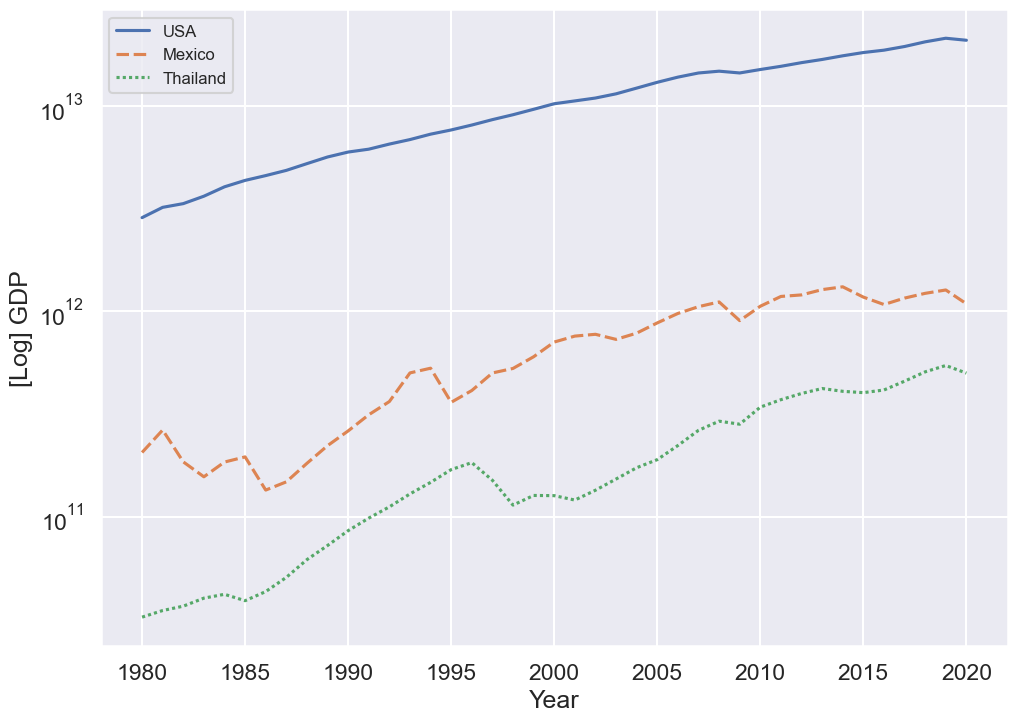

In [234]:
fig = my_xy_line_plot(data_top, 
                      x='Year', 
                      y='GDP', 
                      xlabel='Year',
                      ylabel='[Log] GDP',
                      ylogscale=True,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='upper left',
                      save=False)

In this graph we can see how GDP from the USA, Mexico and Thailand have changed since 1980 to 2020.

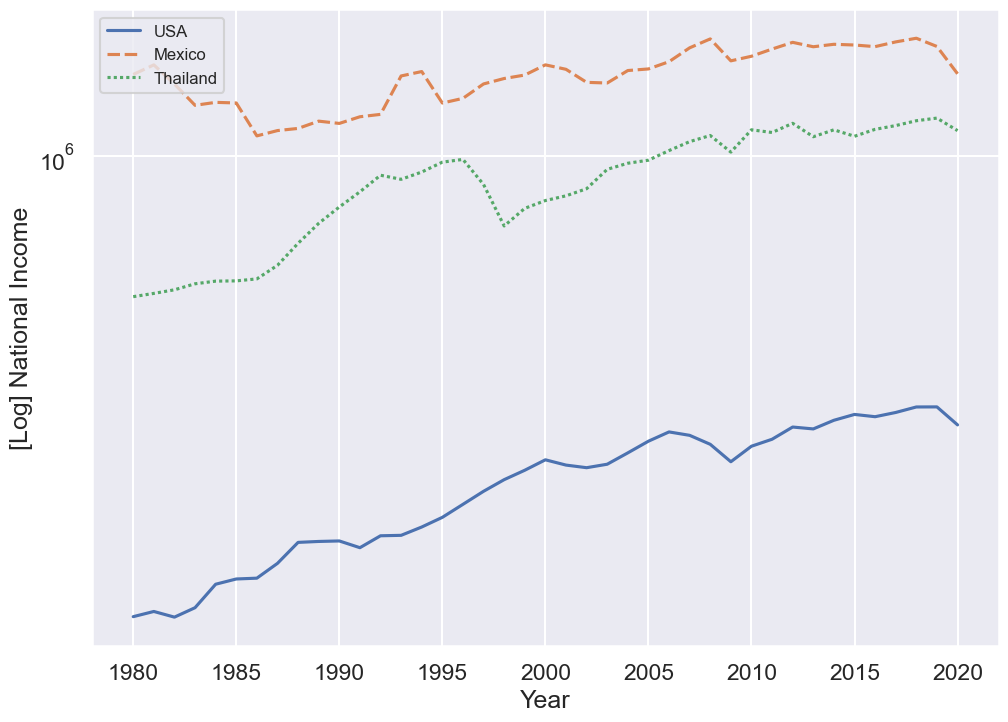

In [235]:
fig = my_xy_line_plot(data_top, 
                      x='Year', 
                      y='National_Income', 
                      xlabel='Year',
                      ylabel='[Log] National Income',
                      ylogscale=True,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='upper left',
                      save=False)

Income inequality of top 10% of all three countries.

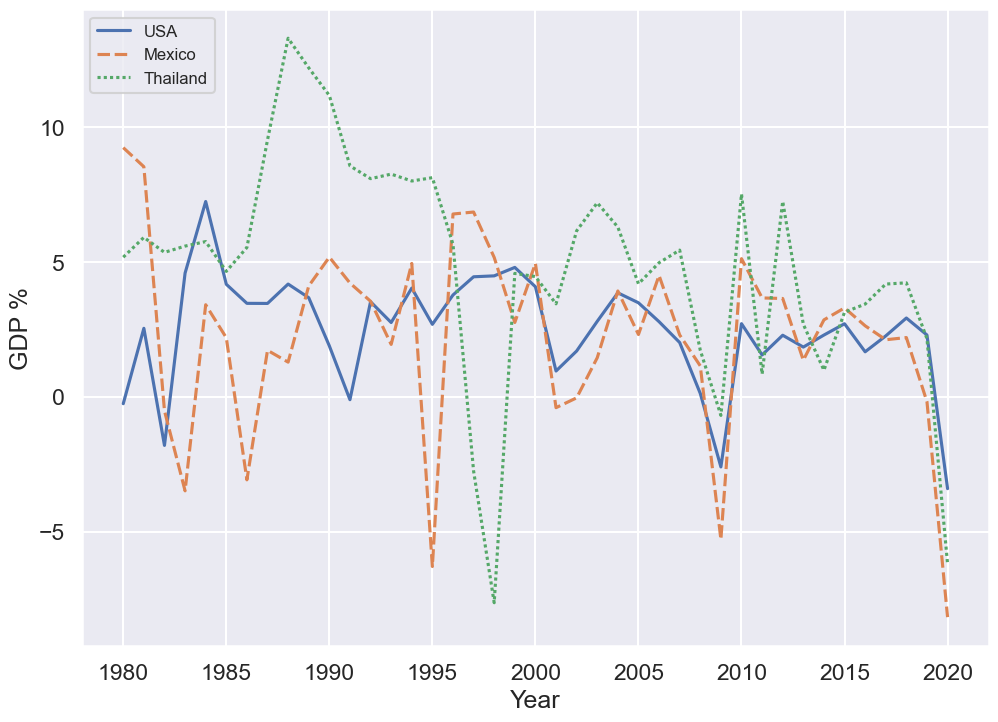

In [236]:
fig = my_xy_line_plot(data_top, 
                      x='Year', 
                      y='GDP_%', 
                      xlabel='Year',
                      ylabel='GDP %',
                      ylogscale=False,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='upper left',
                      save=False)

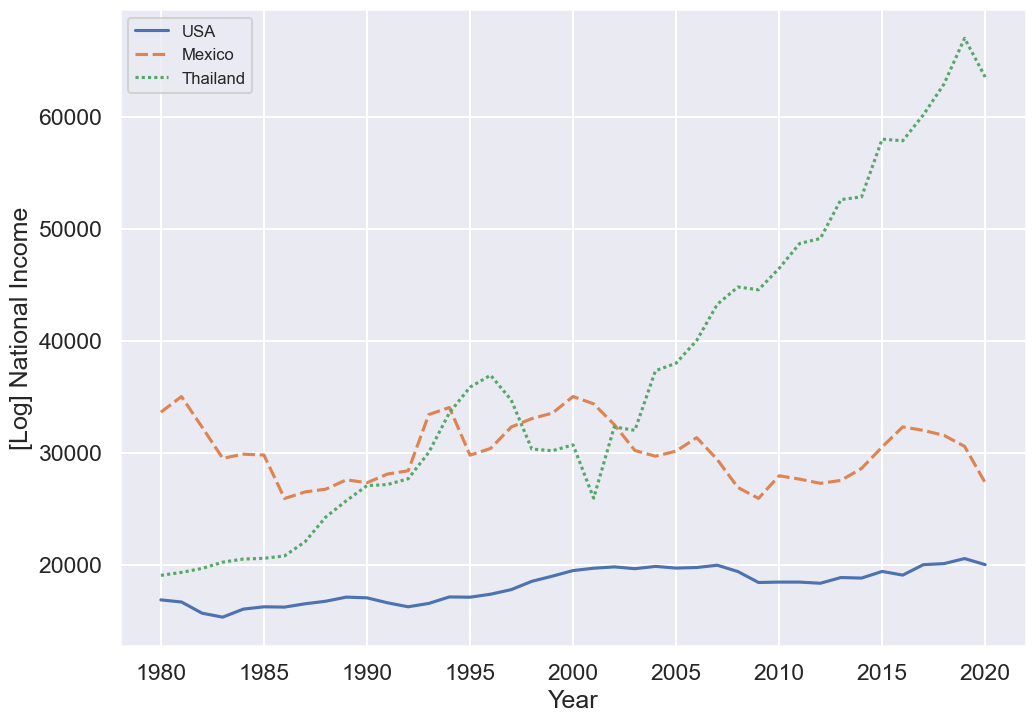

In [237]:
fig = my_xy_line_plot(data_bottom, 
                      x='Year', 
                      y='National_Income', 
                      xlabel='Year',
                      ylabel='[Log] National Income',
                      ylogscale=False,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='upper left',
                      save=False)

Income inequality bottom 50% of all three countries

# Conclusion

In conclusion we found out that even though income inequality does not infact have a big effect on a countries economic growth, income in general does. After lookng at the data and graphs we can see that income inequality has a direct effect on income and countries with more income have the ability to create and develop more and new technologies that in fact have a direct effect on a countries economic growth. We do believe however that if a country wanted to reach economic growth they would need to reduce their income inequality. This is because not only the top 10% of a country can make a hudge impact on the countries economic development it would have to be a group effort. Moreover, from what we can see in our data, USA which over the years has had more economic growth than both Mexico and Thailand has a far smaller income inequality gap. 